In [ ]:
'''
!unzip "../input/higgs-boson/training.zip"
!unzip "../input/higgs-boson/test.zip"
!unzip "../input/higgs-boson/random_submission.zip"
'''

In [1]:
import pandas as pd

## Read files 

df_train = pd.read_csv("../input/higgs-boson/training.zip")
df_test = pd.read_csv("../input/higgs-boson/test.zip")
df_test_label = pd.read_csv("../input/higgs-boson/random_submission.zip")

In [ ]:
print(df_train.info())

In [ ]:
print(df_test.info())

In [ ]:
print(df_test_label.info())

In [2]:
print('Shape of Training Set :',df_train.shape)
print('Shape of Test Set :',df_test.shape)

Shape of Training Set : (250000, 33)
Shape of Test Set : (550000, 31)


In [3]:
print('Columns that do not match')
list(set(df_train.columns)-set(df_test.columns))

Columns that do not match


['Label', 'Weight']

In [4]:
df_train.drop('Weight',axis=1,inplace=True)

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

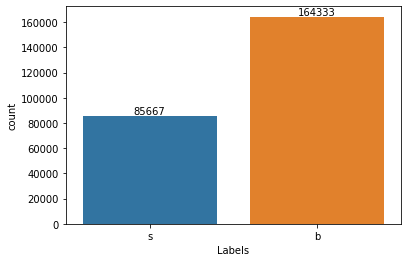

In [6]:
axis = sns.countplot(df_train['Label'])
for i in axis.containers:
    axis.bar_label(i,)
plt.xlabel('Labels')
plt.show()

In [7]:
#Change label to 1 and 0 for s and b respectively
df_train['Label'] = np.where(df_train['Label'] == 's',1,0)

# Set EventId as index
df_train.set_index(['EventId'],inplace = True)
df_test.set_index(['EventId'],inplace = True)


df_train.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Label
EventId,,,,,,,,,,,,,,,,,,,,,
100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,...,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,1
100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,...,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,0
100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,...,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,0
100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,...,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,0
100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,...,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,0


In [8]:
colOutlier = []
for i in df_train.columns:
    print(f'Types of Values in Column {i}')
    temp = df_train[i].value_counts()
    print(temp)
    if -999. in temp:
        colOutlier.append(i)
    print('-'*50)

Types of Values in Column DER_mass_MMC
-999.000    38114
 108.914       10
 96.819        10
 103.762       10
 108.957       10
            ...  
 47.910         1
 274.769        1
 191.831        1
 200.830        1
 217.020        1
Name: DER_mass_MMC, Length: 108338, dtype: int64
--------------------------------------------------
Types of Values in Column DER_mass_transverse_met_lep
1.800      13
9.362      12
3.501      12
2.500      12
3.183      12
           ..
20.637      1
126.732     1
18.280      1
71.255      1
19.362      1
Name: DER_mass_transverse_met_lep, Length: 101637, dtype: int64
--------------------------------------------------
Types of Values in Column DER_mass_vis
76.819     16
61.286     15
70.412     14
76.629     13
71.097     13
           ..
110.242     1
431.917     1
194.393     1
107.121     1
75.839      1
Name: DER_mass_vis, Length: 100558, dtype: int64
--------------------------------------------------
Types of Values in Column DER_pt_h
0.000      4

In [9]:
print('Columns that have -999. value')
colOutlier

Columns that have -999. value


['DER_mass_MMC',
 'DER_deltaeta_jet_jet',
 'DER_mass_jet_jet',
 'DER_prodeta_jet_jet',
 'DER_lep_eta_centrality',
 'PRI_jet_leading_pt',
 'PRI_jet_leading_eta',
 'PRI_jet_leading_phi',
 'PRI_jet_subleading_pt',
 'PRI_jet_subleading_eta',
 'PRI_jet_subleading_phi']

In [10]:
print('Instances of -999.\n')
for i in colOutlier:
    print(i,':\n',max(df_train[i].value_counts()))
    print(f'Percentage of Dataset that is meaningless : {max(df_train[i].value_counts())/len(df_train)}\n')

Instances of -999.

DER_mass_MMC :
 38114
Percentage of Dataset that is meaningless : 0.152456

DER_deltaeta_jet_jet :
 177457
Percentage of Dataset that is meaningless : 0.709828

DER_mass_jet_jet :
 177457
Percentage of Dataset that is meaningless : 0.709828

DER_prodeta_jet_jet :
 177457
Percentage of Dataset that is meaningless : 0.709828

DER_lep_eta_centrality :
 177457
Percentage of Dataset that is meaningless : 0.709828

PRI_jet_leading_pt :
 99913
Percentage of Dataset that is meaningless : 0.399652

PRI_jet_leading_eta :
 99913
Percentage of Dataset that is meaningless : 0.399652

PRI_jet_leading_phi :
 99913
Percentage of Dataset that is meaningless : 0.399652

PRI_jet_subleading_pt :
 177457
Percentage of Dataset that is meaningless : 0.709828

PRI_jet_subleading_eta :
 177457
Percentage of Dataset that is meaningless : 0.709828

PRI_jet_subleading_phi :
 177457
Percentage of Dataset that is meaningless : 0.709828



In [11]:
#Dropping the Columns who have more than 50% meaningless data 

colImpute = ['DER_mass_MMC','PRI_jet_leading_pt','PRI_jet_leading_eta','PRI_jet_leading_phi']
colDrop = list(set(colOutlier) - set(colImpute))
colDrop

['PRI_jet_subleading_phi',
 'DER_prodeta_jet_jet',
 'PRI_jet_subleading_eta',
 'PRI_jet_subleading_pt',
 'DER_mass_jet_jet',
 'DER_lep_eta_centrality',
 'DER_deltaeta_jet_jet']

In [12]:
df_train.drop(colDrop,axis=1,inplace=True)
df_test.drop(colDrop,axis=1,inplace=True)

In [13]:
df_train.shape

(250000, 24)

In [14]:
ind = df_train.index
colname = df_train.columns

In [15]:
import numpy as np
from sklearn.impute import SimpleImputer

#Imputing the arbitrary values to the median
imp = SimpleImputer(missing_values=-999.,strategy='median')
df_train = imp.fit_transform(df_train)

In [16]:
df_train = pd.DataFrame(df_train,index = ind, columns = colname)

In [17]:
print('Imputing -999.\n')
for i in colImpute:
    print(i,':\n',df_train[i].value_counts())
    print()

Imputing -999.

DER_mass_MMC :
 112.406    38117
111.123       10
121.261       10
130.799       10
108.957       10
           ...  
47.910         1
274.769        1
191.831        1
200.830        1
217.020        1
Name: DER_mass_MMC, Length: 108337, dtype: int64

PRI_jet_leading_pt :
 65.561     99917
36.493        10
36.358        10
30.363        10
31.739        10
           ...  
62.489         1
72.548         1
53.942         1
129.874        1
141.752        1
Name: PRI_jet_leading_pt, Length: 86589, dtype: int64

PRI_jet_leading_eta :
  0.000    99939
-1.507       64
 0.906       52
-1.699       52
 1.702       49
          ...  
-4.305        1
-4.028        1
-3.996        1
 4.472        1
-3.880        1
Name: PRI_jet_leading_eta, Length: 8557, dtype: int64

PRI_jet_leading_phi :
 -0.033    99929
-0.157       46
 2.127       44
-2.335       42
 1.018       42
          ...  
-0.061        9
 0.901        9
 1.288        8
 0.237        6
-3.142        3
Name: PRI_jet_

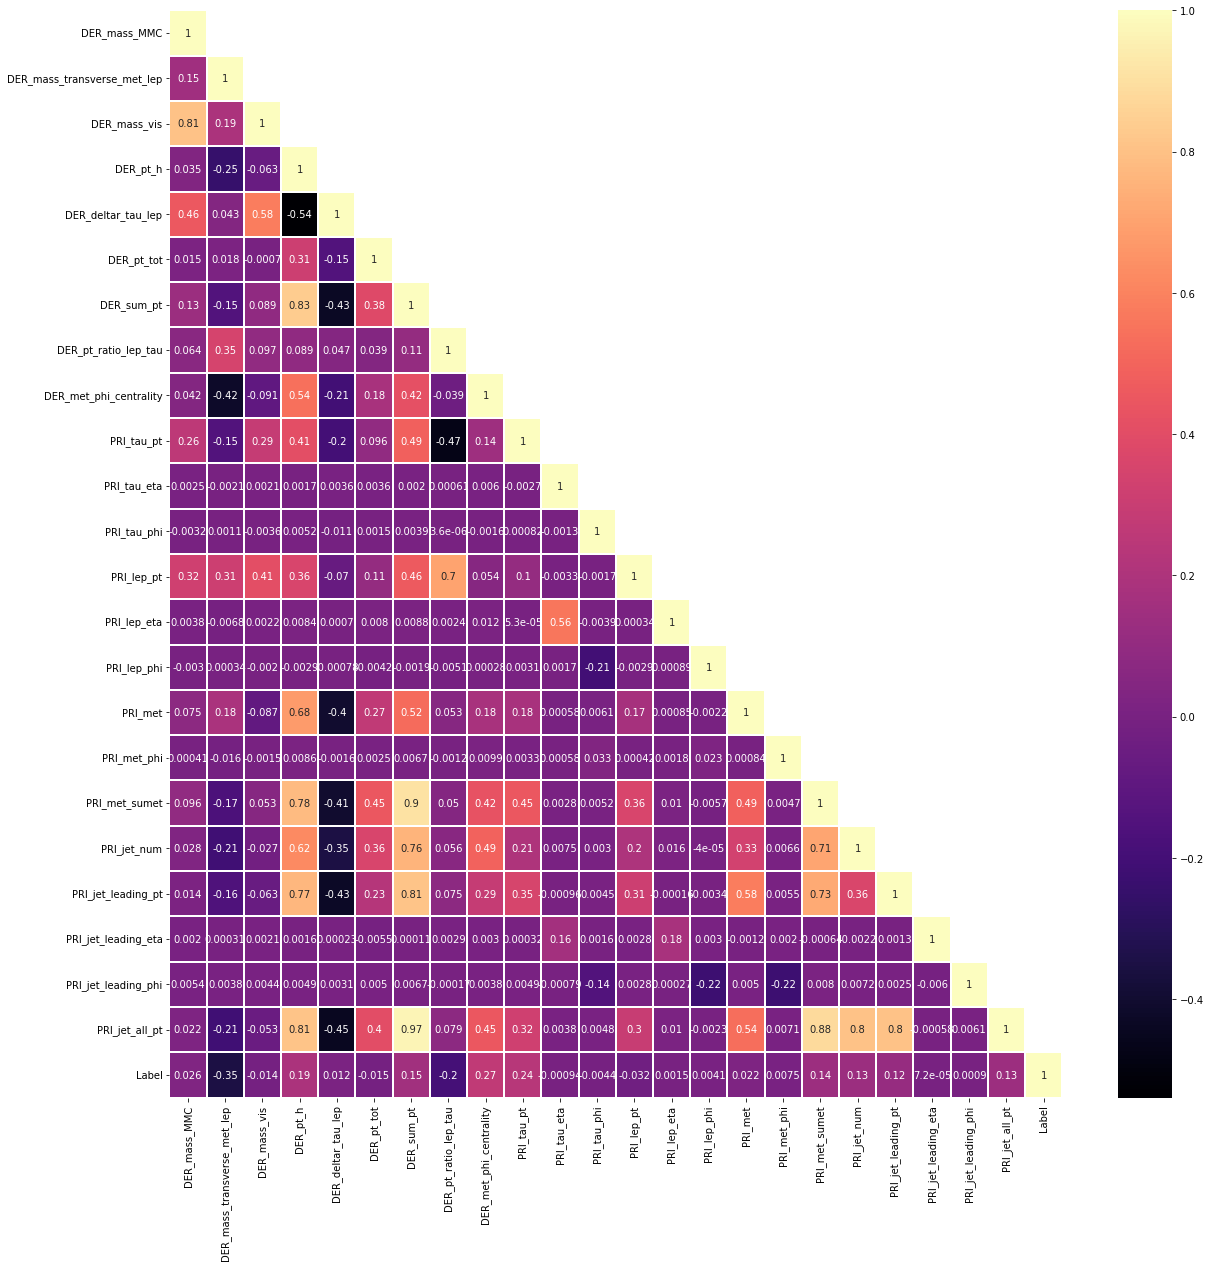

In [18]:
# Displaying the correlation matrix

corr = df_train.corr()
plt.figure(figsize = (20,20))
sns.heatmap(corr.where(np.tril(np.ones(corr.shape)).astype(bool)), cbar = True, cmap = 'magma', linewidth = 2, annot = True, fmt = '.2g')

plt.show()

In [19]:
# Removing the columns that have high correlation 
highcor = []
prevcol = list(df_train.columns)
for i in range(len(corr.columns)):
    for j in range(i):
        if corr.iloc[i][j] > 0.79:
            try:
               #df_train.drop(corr.columns[j],axis=1,inplace=True)
               highcor.extend([ corr.columns[j],corr.columns[i] ])
            except:
                pass
else:
    highcor = list(set(highcor))

In [20]:
print('Column names that have high correlation with others')
highcor

Column names that have high correlation with others


['DER_mass_vis',
 'PRI_jet_num',
 'PRI_met_sumet',
 'PRI_jet_leading_pt',
 'DER_mass_MMC',
 'PRI_jet_all_pt',
 'DER_sum_pt',
 'DER_pt_h']

In [21]:
#Highest Correlation so dropping them
drophighcor = ['DER_pt_h','DER_sum_pt','PRI_jet_all_pt']

df_train.drop(drophighcor,axis=1,inplace=True)
df_test.drop(drophighcor,axis=1,inplace=True)

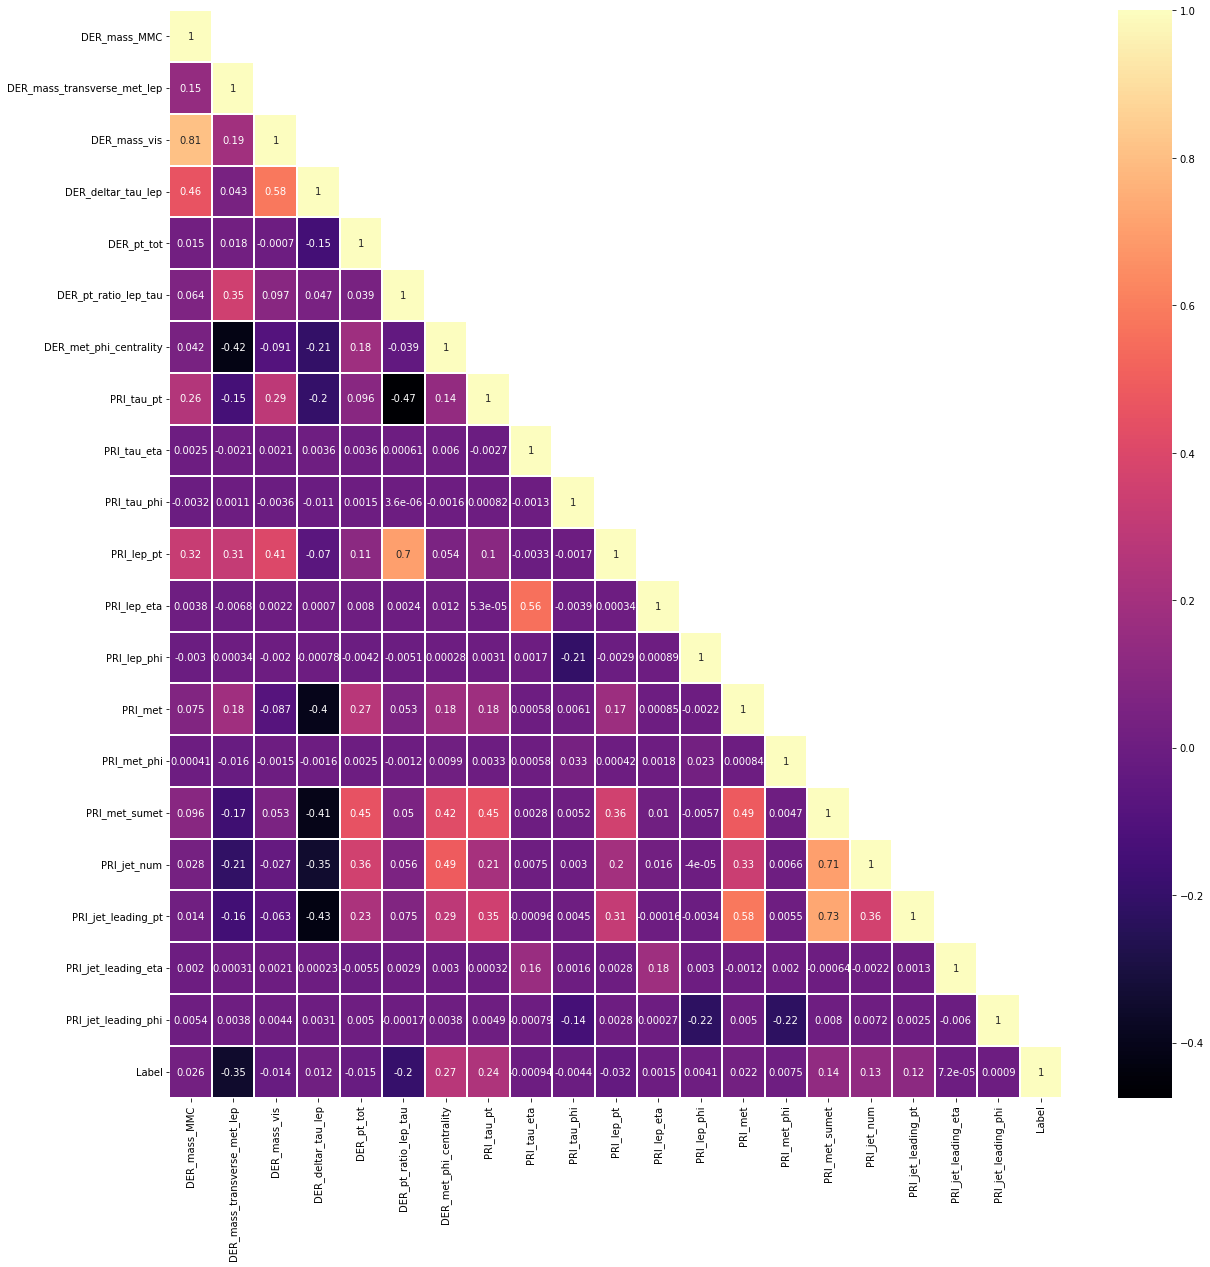

In [22]:
corr = df_train.corr()
plt.figure(figsize = (20,20))
sns.heatmap(corr.where(np.tril(np.ones(corr.shape)).astype(bool)), cbar = True, cmap = 'magma', linewidth = 2, annot = True, fmt = '.2g')

plt.show()

In [23]:
df_train.describe()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_deltar_tau_lep,DER_pt_tot,DER_pt_ratio_lep_tau,DER_met_phi_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,...,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,Label
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,120.417434,49.239819,81.181982,2.373100,18.917332,1.437609,-0.128305,38.707419,-0.010973,-0.008171,...,-0.019507,0.043543,41.717235,-0.010119,209.797178,0.979176,77.124366,-0.001966,-0.020629,0.342668
std,52.859218,35.344886,40.828691,0.782911,22.273494,0.844743,1.193585,22.412081,1.214079,1.816763,...,1.264982,1.816611,32.894693,1.812223,126.499506,0.977426,47.939899,1.382703,1.405084,0.474603
min,9.044000,0.000000,6.329000,0.208000,0.000000,0.047000,-1.414000,20.000000,-2.499000,-3.142000,...,-2.505000,-3.142000,0.109000,-3.142000,13.678000,0.000000,30.000000,-4.499000,-3.142000,0.000000
25%,95.665000,19.241000,59.388750,1.810000,2.841000,0.883000,-1.371000,24.591750,-0.925000,-1.575000,...,-1.014000,-1.522000,21.398000,-1.575000,123.017500,0.000000,57.439000,-0.433000,-0.556000,0.000000
50%,112.406000,46.524000,73.752000,2.491500,12.315500,1.280000,-0.356000,31.804000,-0.023000,-0.033000,...,-0.045000,0.086000,34.802000,-0.024000,179.739000,1.000000,65.561000,0.000000,-0.033000,0.000000
75%,130.606250,73.598000,92.259000,2.961000,27.591000,1.777000,1.225000,45.017000,0.898000,1.565000,...,0.959000,1.618000,51.895000,1.561000,263.379250,2.000000,75.349000,0.433000,0.503000,1.000000
max,1192.026000,690.075000,1349.351000,5.684000,2834.999000,19.773000,1.414000,764.408000,2.497000,3.142000,...,2.503000,3.142000,2842.617000,3.142000,2003.976000,3.000000,1120.573000,4.499000,3.141000,1.000000


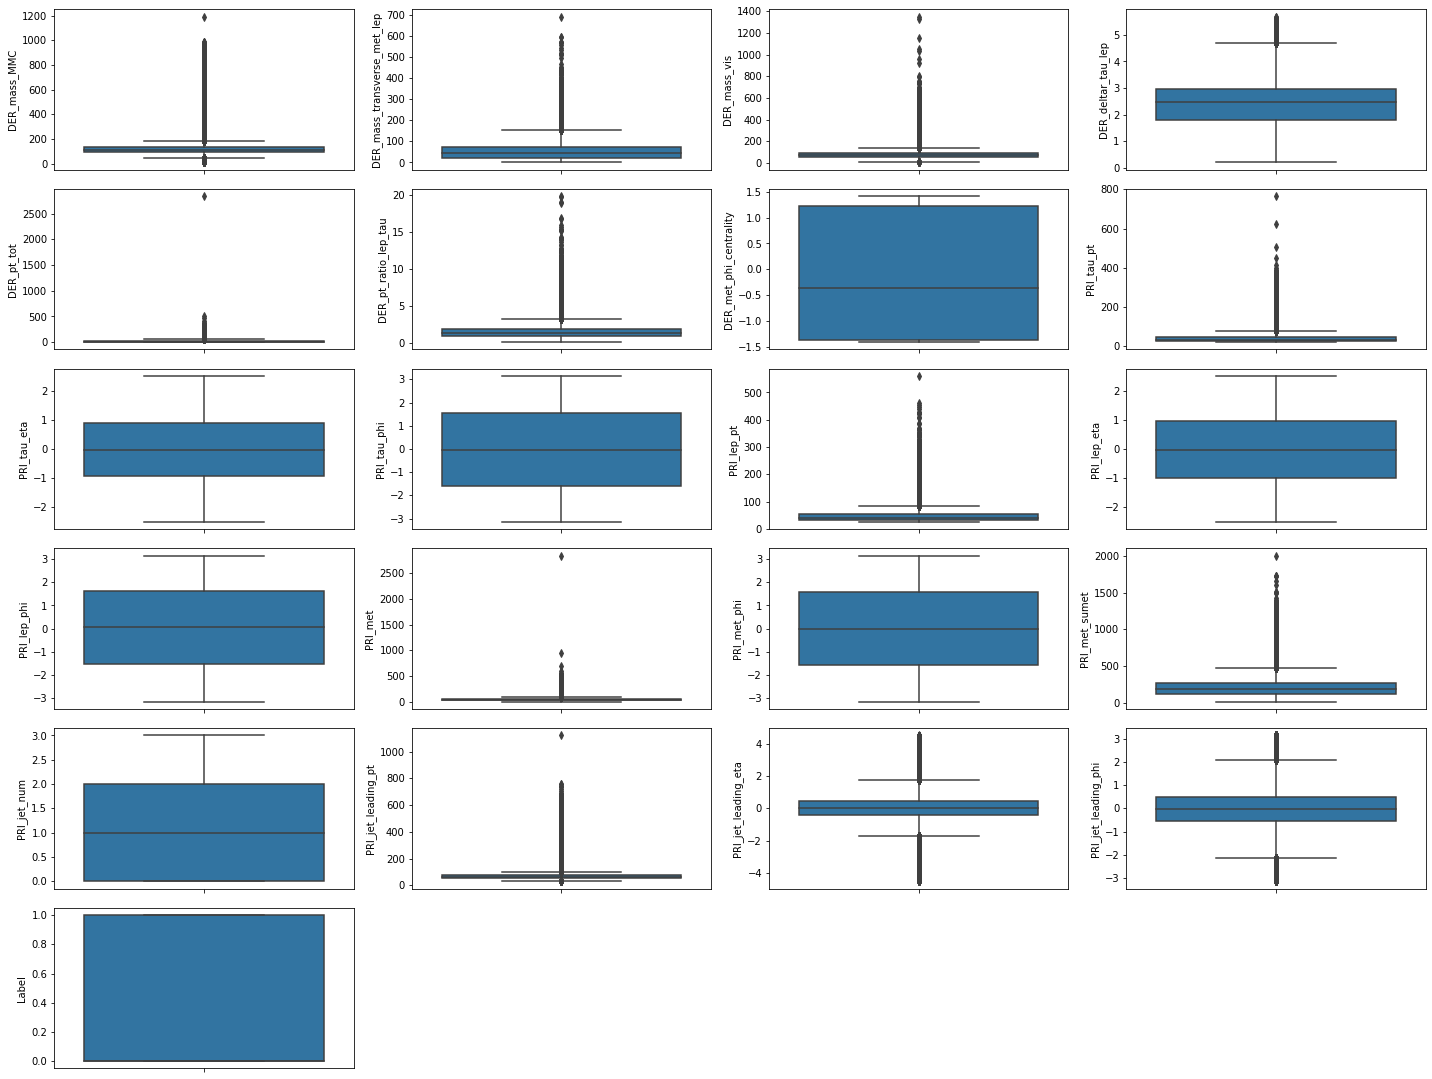

In [24]:
features = df_train.columns
plt.figure(figsize = (20, 20))
for i, name in enumerate(features):
  plt.subplot(8, 4, i+1)
  sns.boxplot(y = df_train[name])
  
plt.tight_layout()
plt.show()

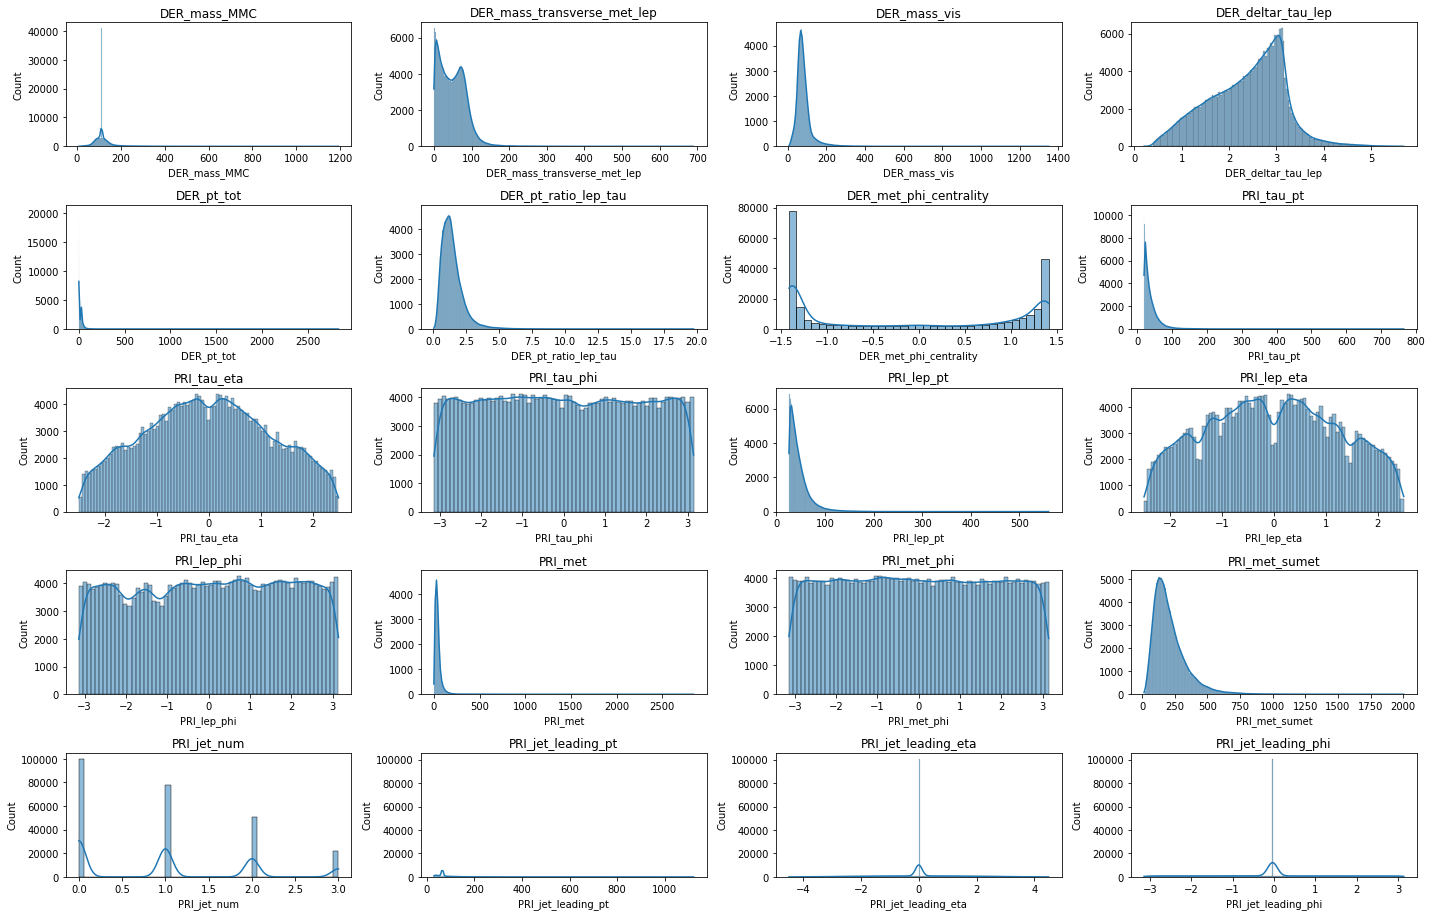

In [25]:
features = df_train.columns[:-1]
plt.figure(figsize = (20, 20))
countind = 1
for i in features:
    plt.subplot(8, 4, countind)
    plt.title(i)
    sns.histplot(data=df_train[i], kde=True)
    countind += 1
plt.tight_layout()
plt.show()

In [26]:
normaldist = ['DER_mass_MMC','DER_mass_vis','DER_pt_tot',
              'DER_pt_ratio_lep_tau','PRI_tau_pt','PRI_lep_pt',
              'PRI_met','PRI_met_sumet','PRI_jet_leading_pt','PRI_jet_leading_eta','PRI_jet_leading_phi']

In [27]:
df_train.shape

(250000, 21)

In [28]:
z = normaldist
for i in z:
    q25 = df_train[i].quantile(0.25)
    q75 = df_train[i].quantile(0.75)
    IQR = q75 - q25
    
    upperlim = q75 + 1.5*IQR
    lowerlim = q25 - 1.5*IQR
    
    df_train.drop(df_train[ df_train[ i ] > upperlim].index,inplace = True)
    df_train.drop(df_train[ df_train[ i ] < lowerlim].index,inplace = True)

In [29]:
df_train.shape

(87471, 21)

In [ ]:
'''
z = df_train.describe()
for i,v in enumerate(z.loc['std']):
  mean = z.loc['mean'][i]
  std = v
  df_train.drop(df_train[ df_train[ df_train.columns[i] ] > (mean + 3*v)].index,inplace = True)
  df_train.drop(df_train[ df_train[ df_train.columns[i] ] < (mean - 3*v)].index,inplace = True)
    
features = df_train.columns
plt.figure(figsize = (20, 20))
for i, name in enumerate(features):
  plt.subplot(8, 4, i+1)
  sns.boxplot(y = df_train[name])
  
plt.tight_layout()
plt.show()
'''

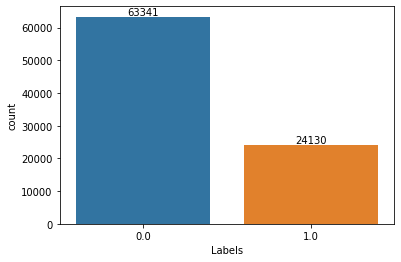

In [30]:
axis = sns.countplot(df_train['Label'])
for i in axis.containers:
    axis.bar_label(i,)
plt.xlabel('Labels')
plt.show()

In [31]:
from sklearn.preprocessing import LabelEncoder,normalize,MinMaxScaler,StandardScaler
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve

In [32]:
# Separating Label from dataset
x = df_train.drop('Label',axis=1)

y = df_train['Label']

In [33]:
#Dividing the data into validation and training set
divlen = int(0.8*len(y))
X_train, X_val = x.values[:divlen], x.values[divlen:]
y_train, y_val = y.values[:divlen], y.values[divlen:]

In [ ]:
'''
from sklearn.model_selection import KFold


kf = KFold(n_splits=5, random_state=2020, shuffle=True)
*_,last = kf.split(x)

X_train, X_val = x.iloc[last[0]], x.iloc[last[1]]
y_train, y_val = y.iloc[last[0]], y.iloc[last[1]]

X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state = 0)
'''  

In [34]:
# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)

In [35]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(69976, 20)
(69976,)
(17495, 20)
(17495,)


In [36]:
#Reshaping to 3D for the model
X_train = X_train.reshape(-1, 1, 20)
X_val  = X_val.reshape(-1, 1, 20)
y_train = y_train.reshape(-1, 1,)
y_val = y_val.reshape(-1, 1,)

print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(69976, 1, 20)
(69976, 1)
(17495, 1, 20)
(17495, 1)


In [37]:
import tensorflow.compat.v1 as tf
tf.logging.set_verbosity(tf.logging.ERROR)

In [38]:
# Importing layers, callbacks and model
import tensorflow as tf
from tensorflow.keras.layers import LSTM,GRU, Bidirectional,Input, Dropout, Flatten, Dense,LeakyReLU
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [39]:
import time
## Building LSTM + GRU model

## Layers prep
input_layer = Input(shape=(X_train.shape[1],X_train.shape[2]))
main_rnn_layer = GRU(256, return_sequences=True, recurrent_dropout=0.2)(input_layer)
rnn = LSTM(160)(main_rnn_layer)
dense = Dense(256, activation = "tanh")(rnn)
dropout_c = Dropout(0.8)(dense)
classes = Dense(1, activation= "sigmoid",name="class")(dropout_c)

## Build
model = Model(input_layer, classes)

## Compile
model.compile(loss=[tf.keras.losses.MeanSquaredLogarithmicError(),tf.keras.losses.MeanSquaredLogarithmicError()], optimizer='adam', metrics = ['accuracy'])

## Summary
model.summary()

## Callbacks
callbacks = [ReduceLROnPlateau(monitor='val_loss', patience=4,mode='min', verbose=1, factor=0.2),
             EarlyStopping(monitor='val_loss', patience=20),
             ModelCheckpoint(filepath='best_model(LSTM+GRU).h5', monitor='val_loss', save_best_only=True)]

## Fit the model
timestart = time.time()
history = model.fit(X_train, y_train, 
          epochs = 150, 
          batch_size = 20, 
          validation_data=(X_val,  y_val), 
          callbacks=callbacks)
timeelapsed = time.time() - timestart

2022-10-08 19:19:52.985858: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1, 20)]           0         
_________________________________________________________________
gru (GRU)                    (None, 1, 256)            213504    
_________________________________________________________________
lstm (LSTM)                  (None, 160)               266880    
_________________________________________________________________
dense (Dense)                (None, 256)               41216     
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
class (Dense)                (None, 1)                 257       
Total params: 521,857
Trainable params: 521,857
Non-trainable params: 0
_______________________________________________________

2022-10-08 19:19:53.554832: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


3499/3499 [==============================] - 39s 10ms/step - loss: 0.0576 - accuracy: 0.8306 - val_loss: 0.0576 - val_accuracy: 0.8356
Epoch 2/150
3499/3499 [==============================] - 33s 9ms/step - loss: 0.0559 - accuracy: 0.8354 - val_loss: 0.0559 - val_accuracy: 0.8356
Epoch 3/150
3499/3499 [==============================] - 34s 10ms/step - loss: 0.0553 - accuracy: 0.8360 - val_loss: 0.0549 - val_accuracy: 0.8341
Epoch 4/150
3499/3499 [==============================] - 34s 10ms/step - loss: 0.0549 - accuracy: 0.8370 - val_loss: 0.0544 - val_accuracy: 0.8364
Epoch 5/150
3499/3499 [==============================] - 33s 10ms/step - loss: 0.0547 - accuracy: 0.8380 - val_loss: 0.0544 - val_accuracy: 0.8384
Epoch 6/150
3499/3499 [==============================] - 33s 10ms/step - loss: 0.0545 - accuracy: 0.8373 - val_loss: 0.0544 - val_accuracy: 0.8368
Epoch 7/150
3499/3499 [==============================] - 34s 10ms/step - loss: 0.0542 - accuracy: 0.8380 - val_loss: 0.0545 - val_a

In [ ]:
'''
bdata = df_train[df_train['Label'] == 0].drop('Label',axis=1)
bLabel = np.zeros((len(bdata),1))

splitfactor = int(0.8*len(bdata))
bdata,bval = bdata[:splitfactor],bdata[splitfactor:]
bLabeltrain,bLabelval = bLabel[:splitfactor],bLabel[splitfactor:]

sc2 = StandardScaler()

bdata = sc2.fit_transform(bdata)
bval = sc2.transform(bval)

bdata = bdata.reshape(-1,1,21)
bval = bval.reshape(-1,1,21)
bLabeltrain = bLabeltrain.reshape(-1,1)
bLabelval = bLabelval.reshape(-1,1)
'''

In [ ]:
'''
import tensorflow as tf
from tensorflow.keras.layers import Conv2D,LSTM,LeakyReLU, MaxPooling2D,Concatenate,Input, Dropout, Flatten, Dense, GlobalAveragePooling2D,Activation, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.models import Model


  # create model
    
timestart = time.time()
#input 
input_layer = Input(shape=(bdata.shape[1],bdata.shape[2]))
main_rnn_layer = LSTM(32, return_sequences=True, recurrent_dropout=0.3)(input_layer)

    
#output
rnn = LSTM(32)(main_rnn_layer)
dense = Dense(64)(rnn)
dropout_c = Dropout(0.5)(dense)
classes = Dense(1, activation= LeakyReLU(alpha=0.1),name="class")(dropout_c)

model = Model(input_layer, classes)

# Compile model
callbacks = [ReduceLROnPlateau(monitor='val_loss', patience=4, verbose=1, factor=0.6),
             EarlyStopping(monitor='val_loss', patience=20),
             ModelCheckpoint(filepath='/kaggle/working/best_model.h5', monitor='val_loss', save_best_only=True)]
model.compile(loss=[tf.keras.losses.MeanSquaredLogarithmicError(),tf.keras.losses.MeanSquaredLogarithmicError()], optimizer="adam")


model.summary()
# Fit the model
historyb = model.fit(bdata, bLabeltrain, 
          epochs = 250, 
          batch_size = 64, 
          validation_data=(bval,  bLabelval), 
          callbacks=callbacks)
timeelapsed = time.time() - timestart
'''

In [ ]:
'''
sdata = sc2.transform(df_train[df_train['Label']==1].drop('Label',axis=1)).reshape(-1,1,21)
spredict = model.predict(sdata)
lblpred = np.where(spredict > 0.5, 0, 1)

bpredict = model.predict(bdata)
blblpred = np.where(bpredict > 0.5, 1, 0)
'''

In [40]:
from tensorflow.keras.models import load_model

## Uploading the saved model from drive (4th one - LSTM + GRU)
best_model = load_model('/kaggle/working/best_model(LSTM+GRU).h5')
history = best_model # saving it in histroy variable to be used ahead
history.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1, 20)]           0         
_________________________________________________________________
gru (GRU)                    (None, 1, 256)            213504    
_________________________________________________________________
lstm (LSTM)                  (None, 160)               266880    
_________________________________________________________________
dense (Dense)                (None, 256)               41216     
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
class (Dense)                (None, 1)                 257       
Total params: 521,857
Trainable params: 521,857
Non-trainable params: 0
_______________________________________________________

In [41]:
df_test.shape

(550000, 20)

In [ ]:
'''
for i in highcor:
    df_test.drop(i,axis=1,inplace=True)
df_test.head()
'''

In [42]:
indTest = df_test.index
colTest = df_test.columns

In [43]:
df_test = imp.fit_transform(df_test)

In [44]:
df_test = pd.DataFrame(df_test,index = indTest, columns = colTest)

In [45]:
X_test = sc.transform(df_test)

In [46]:
test = X_test
print(test.shape)

## Reshaping it for sequnce models
test = test.reshape(-1, 1,20)
print(test.shape)

## Using the saved model to predict the test set
predictions = history.predict(test)
predictions

(550000, 20)
(550000, 1, 20)


array([[4.7144294e-04],
       [2.6164800e-02],
       [4.7562626e-01],
       ...,
       [2.6366383e-02],
       [4.2294782e-01],
       [1.2867418e-01]], dtype=float32)

In [52]:
test[4]

array([[-1.49799009e+00,  9.40502941e-01, -6.96646259e-01,
        -2.54787495e+00,  4.81922405e+00,  6.65445762e-01,
        -3.59501763e-03,  1.13530149e+00, -1.24923632e+00,
         1.04101212e+00,  3.55925292e+00, -1.44220766e+00,
         1.53804946e+00, -4.77989911e-01, -1.15806446e-01,
         1.51814945e+01,  3.00000000e+00,  1.88524000e+02,
        -1.01300000e+00, -3.01000000e-01]])

In [53]:
pred = np.where(predictions > 0.5, 1, 0)

test_predict = pd.Series(pred[:,0])
test_predict

0         0
1         0
2         0
3         1
4         0
         ..
549995    0
549996    0
549997    0
549998    0
549999    0
Length: 550000, dtype: int64

In [54]:
## Read the random submission file provided in the data
submission_actual = pd.read_csv("../input/higgs-boson/random_submission.zip")
submission_actual.head()

,EventId,RankOrder,Class
0,350000,416957,b
1,350001,89624,b
2,350002,519845,b
3,350003,510885,s
4,350004,455944,s


In [55]:
## Bring our prediction into the same format
test_predict = pd.DataFrame({"EventId":submission_actual['EventId'],"RankOrder":submission_actual['RankOrder'],"Class":test_predict})
test_predict

,EventId,RankOrder,Class
0,350000,416957,0
1,350001,89624,0
2,350002,519845,0
3,350003,510885,1
4,350004,455944,0
...,...,...,...
549995,899995,46701,0
549996,899996,323731,0
549997,899997,357749,0
549998,899998,486844,0


In [56]:
test_predict = test_predict.replace(1,'s')
test_predict = test_predict.replace(0,'b')
test_predict

,EventId,RankOrder,Class
0,350000,416957,b
1,350001,89624,b
2,350002,519845,b
3,350003,510885,s
4,350004,455944,b
...,...,...,...
549995,899995,46701,b
549996,899996,323731,b
549997,899997,357749,b
549998,899998,486844,b


In [57]:
test_predict.to_csv("/kaggle/working/submission_predicion.csv",index=False)

In [58]:
## Reading the csv file of submission
submission_prediction = pd.read_csv("/kaggle/working/submission_predicion.csv")
prediction_labels = submission_prediction['Class']
prediction_labels = prediction_labels.replace('s',1)
prediction_labels = prediction_labels.replace('b',0)
prediction_labels = prediction_labels.values

In [59]:
actual_labels = submission_actual['Class']
actual_labels = actual_labels.replace('s',1)
actual_labels = actual_labels.replace('b',0)

In [60]:
## Using sklearn to compute confusion matrics and accuracy score!
from sklearn.metrics import confusion_matrix , accuracy_score
import math

In [61]:
Accuracy = accuracy_score(actual_labels,prediction_labels)
Accuracy

0.6385818181818181

In [62]:
## Check the confusion matrix
confusion_matrix = confusion_matrix(prediction_labels,actual_labels)
confusion_matrix

array([[326243, 139687],
       [ 59093,  24977]])

In [63]:
TP = confusion_matrix[0][0]
FP = confusion_matrix[0][1]
FN = confusion_matrix[1][0]
TN = confusion_matrix[1][1]

In [64]:
TPR = (TP /(TP + FN))
SP = (TN / (FP + TN))
FPR = 1- SP

s = TPR
b = FPR

In [65]:
## Function to calculate the AMS score based on s and b values
def AMS(s, b):
    """ Approximate Median Significance defined as:
        AMS = sqrt(
                2 { (s + b + b_r) log[1 + (s/(b+b_r))] - s}
              )        
    where b_r = 10, b = background, s = signal, log is natural logarithm """
    br = 10.0
    radicand = 2 *( (s+b+br) * math.log (1.0 + s/(b+br)) -s)
    if radicand < 0:
        print('radicand is negative. Exiting')
        exit()
    else:
        return print('AMS Metric = ' + str(math.sqrt(radicand)))

In [66]:
AMS(s, b)

AMS Metric = 0.253812389582877
